<a href="https://colab.research.google.com/github/GODxFATHER/Bike-Sharing-Demand-Prediction/blob/main/Individual_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib --upgrade     # updating matplotlib as we are using bar_label function which is introduced in recent versions(matplotlib >= 3.4.2) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [2]:
# 1. Prepare Problem


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

> **1.(a) Load libraries**


In [3]:
# Importing Libraries

#numpy pandas for data manipulation
import numpy as np 
import pandas as pd

#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#not displaying warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from pandas import set_option

#to calculate stats
from scipy import stats
from scipy.stats import norm, skew

# Configuration for matplotlib graphs
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [4]:
# Importing feature engineering and model training libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, make_scorer
from yellowbrick.model_selection import rfecv, LearningCurve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

> **1.(b) Load dataset**

In [5]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Loading the csv file into pandas dataframe

path_n = "/content/drive/MyDrive/DATA_FILES/SeoulBikeData.csv"
df = pd.read_csv(path_n, encoding= 'unicode_escape')

>  **2. Summarize Data**



> **2.(a) Descriptive statistics**

In [7]:
#head

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
#head

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


**We can see that attributes are on different scale**

**We can use transformations**

In [9]:
#shape

df.shape

(8760, 14)

**We have 8760 rows and 14 feature**

In [10]:
#duplicates 

df.duplicated().sum()

0

  **There are no duplicate rows in dataset**

In [11]:
#Null value check

df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There are no missing values**

In [12]:
#types

df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

**We can see that 10 attributes are numeric with float and int values and other 4 contain categorical values**

**I should convert 'Date' column to datatime data type**

In [13]:
#converting  'Date' column to datatime data type

df.Date = df.Date.astype('datetime64')

In [14]:
#Extracting new feature from 'Date' column

df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month_name()
df['Weekday'] = df.Date.dt.day_name()

In [15]:
#Droping Date column

df.drop(columns = 'Date', inplace = True)

In [16]:
#description numerical columns

set_option('precision', 1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,7.0e+02,645.0,0.0,191.0,5.0e+02,1065.2,3556.0
Hour,8760.0,1.2e+01,6.9,0.0,5.8,1.2e+01,17.2,23.0
Temperature(°C),8760.0,1.3e+01,11.9,-17.8,3.5,1.4e+01,22.5,39.4
Humidity(%),8760.0,5.8e+01,20.4,0.0,42.0,5.7e+01,74.0,98.0
Wind speed (m/s),8760.0,1.7e+00,1.0,0.0,0.9,1.5e+00,2.3,7.4
Visibility (10m),8760.0,1.4e+03,608.3,27.0,940.0,1.7e+03,2000.0,2000.0
Dew point temperature(°C),8760.0,4.1e+00,13.1,-30.6,-4.7,5.1e+00,14.8,27.2
Solar Radiation (MJ/m2),8760.0,5.7e-01,0.9,0.0,0.0,1.0e-02,0.9,3.5
Rainfall(mm),8760.0,1.5e-01,1.1,0.0,0.0,0.0e+00,0.0,35.0
Snowfall (cm),8760.0,7.5e-02,0.4,0.0,0.0,0.0e+00,0.0,8.8


**We can see**
* **outlier in 'Rented_Bike_Count' column**

* **We have to check outliers and use scaling technique**

In [17]:
#describe categorical columns

df.describe(include=['O']).T

,count,unique,top,freq
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning Day,8760,2,Yes,8465
Month,8760,12,January,744
Weekday,8760,7,Sunday,1296


**We can see that**

  * **We have to change dtype of 'Data' column to datetime**
  * **'Seasons',	'Holiday', 'Functioning Day' have 4, 2, 2 unique values**
  * **'Month' and Weekday have 12 and 7 categories**

> **2.(b) Exploratory Data Analysis(Data visualizations)**

> **2.(b).(i) Univaiate Analysis**

> **Dependent Variable**

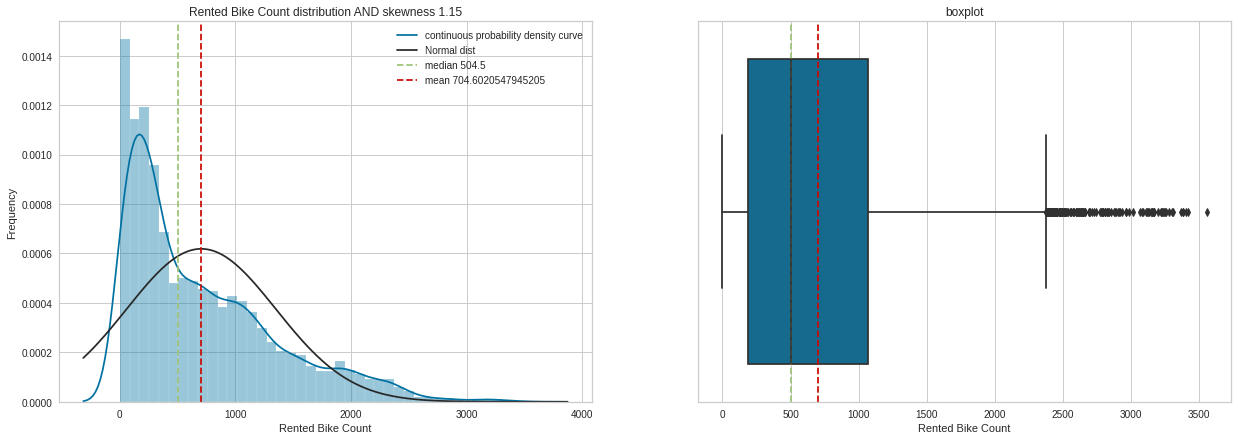

In [18]:
# Distribution of dependent variable

plt.figure(figsize=(21,7))

col='Rented Bike Count'       

mean = df['Rented Bike Count'].mean()
median = df['Rented Bike Count'].median()

plt.subplot(1, 2, 1)
sns.distplot(df[col] , fit=norm, kde =True)
plt.axvline(np.median(df[col]),color='g', linestyle='--', label = 'median')
plt.axvline(np.mean(df[col]),color='r', linestyle='--', label = 'mean')  
plt.legend(['continuous probability density curve', 'Normal dist', f'median {median}', f'mean {mean}' ] , loc='best')    
plt.ylabel('Frequency') 
plt.title(f'{col} distribution AND skewness {round(df[col].skew(),2)}')

plt.subplot(1, 2, 2)
sns.boxplot(df[col])
plt.axvline(np.median(df[col]),color='g', linestyle='--')
plt.axvline(np.mean(df[col]),color='r', linestyle='--')  
plt.title('boxplot') 
  
plt.show()

* **The dependent variable is right Skewed**
* **I will apply sq-rt transformation in later stage so it will become normally distributed. It will help us in bettter modeling helping in relationship between target and independent variables. For now let's visualize how the dependent variable will look after transformation.**


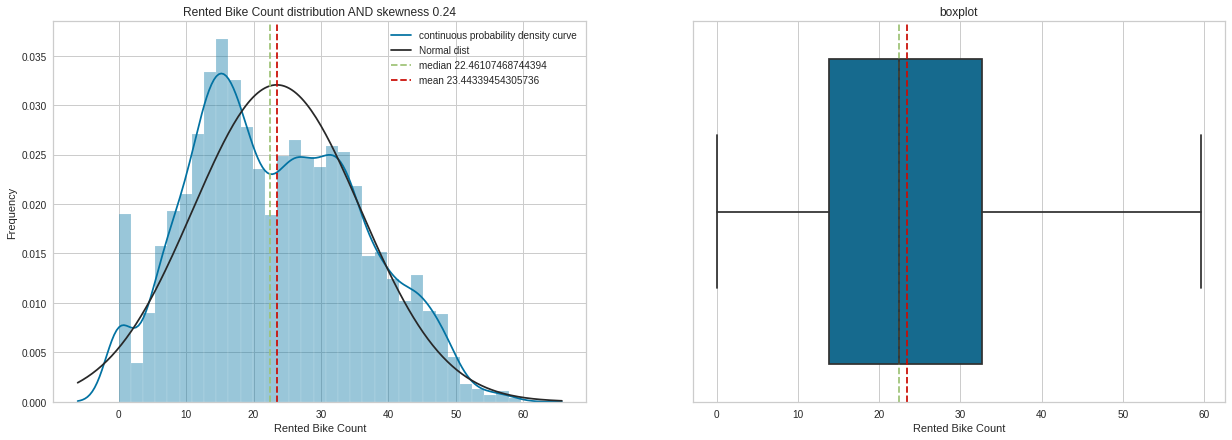

In [19]:
# Distribution of dependent variable

sq = np.sqrt(df["Rented Bike Count"])

myvar = pd.Series(sq)


plt.figure(figsize=(21,7))

col='Rented Bike Count'       

mean = myvar.mean()
median = myvar.median()

plt.subplot(1, 2, 1)
sns.distplot(myvar , fit=norm, kde =True)
plt.axvline(np.median(myvar),color='g', linestyle='--', label = 'median')
plt.axvline(np.mean(myvar),color='r', linestyle='--', label = 'mean')  
plt.legend(['continuous probability density curve', 'Normal dist', f'median {median}', f'mean {mean}' ] , loc='best')    
plt.ylabel('Frequency') 
plt.title(f'{col} distribution AND skewness {round(myvar.skew(),2)}')

plt.subplot(1, 2, 2)
sns.boxplot(myvar)
plt.axvline(np.median(myvar),color='g', linestyle='--')
plt.axvline(np.mean(myvar),color='r', linestyle='--')  
plt.title('boxplot') 
  
plt.show()

**Now the distribution looks closer to normal distribution.**

> **Continous Variable**

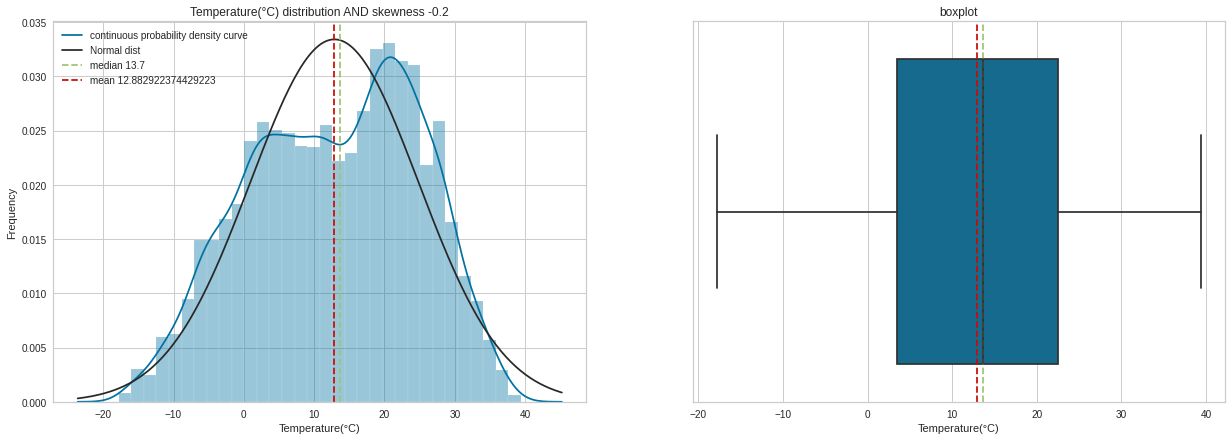

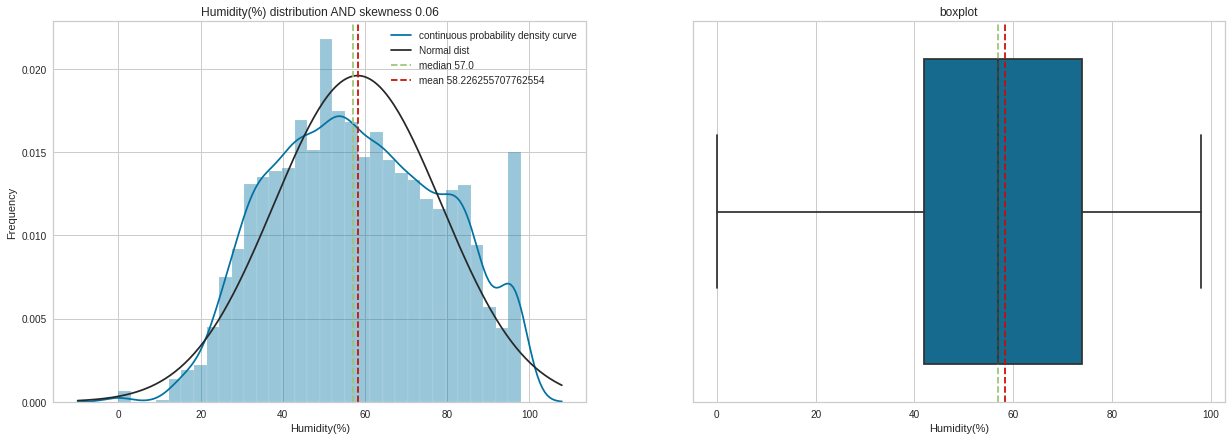

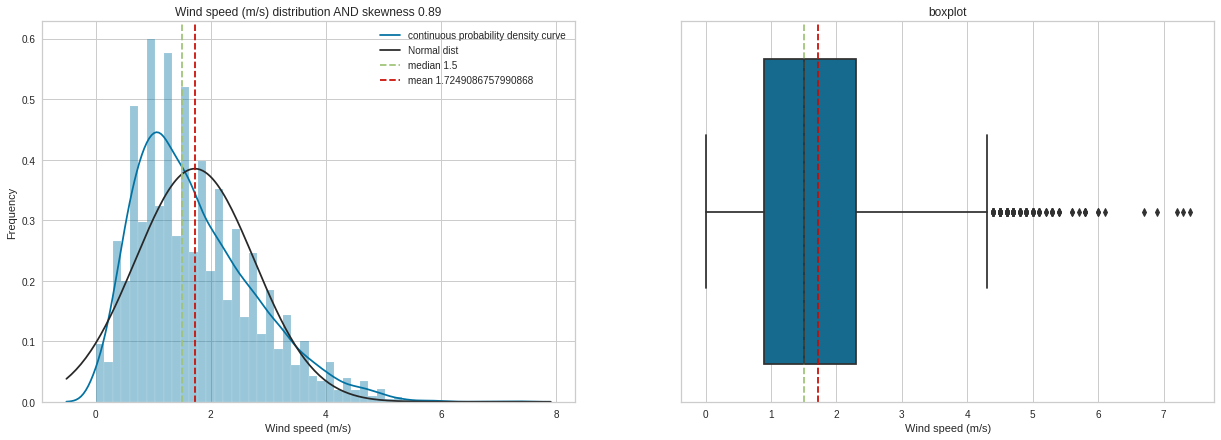

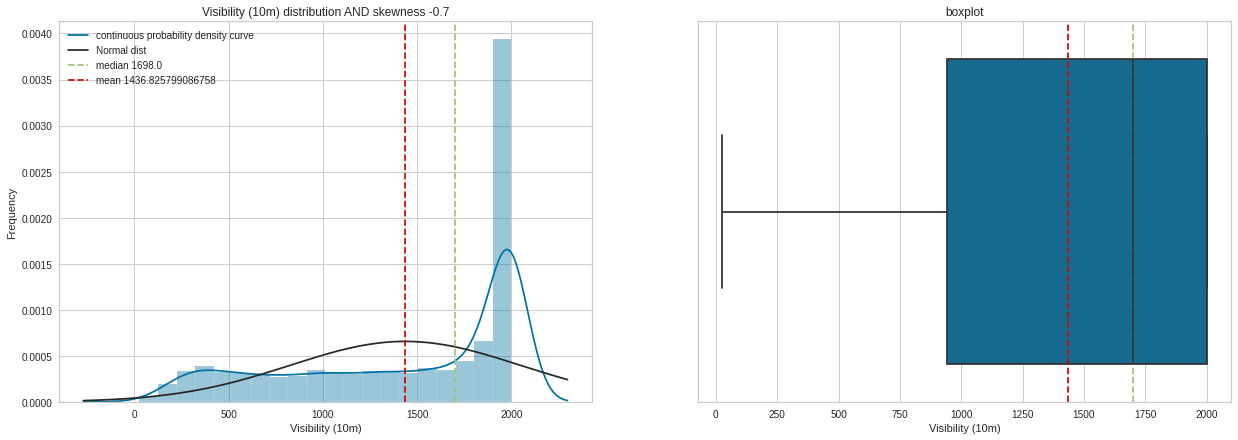

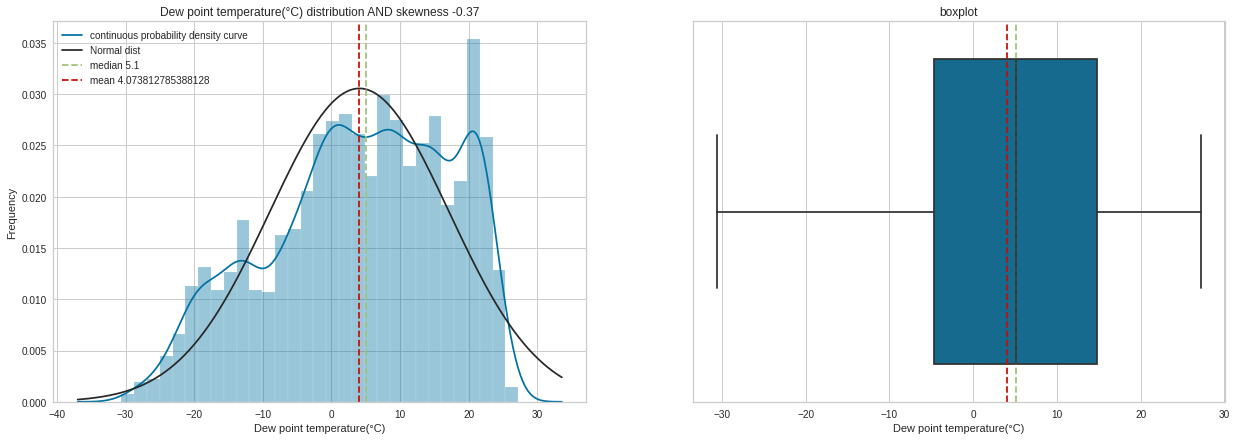

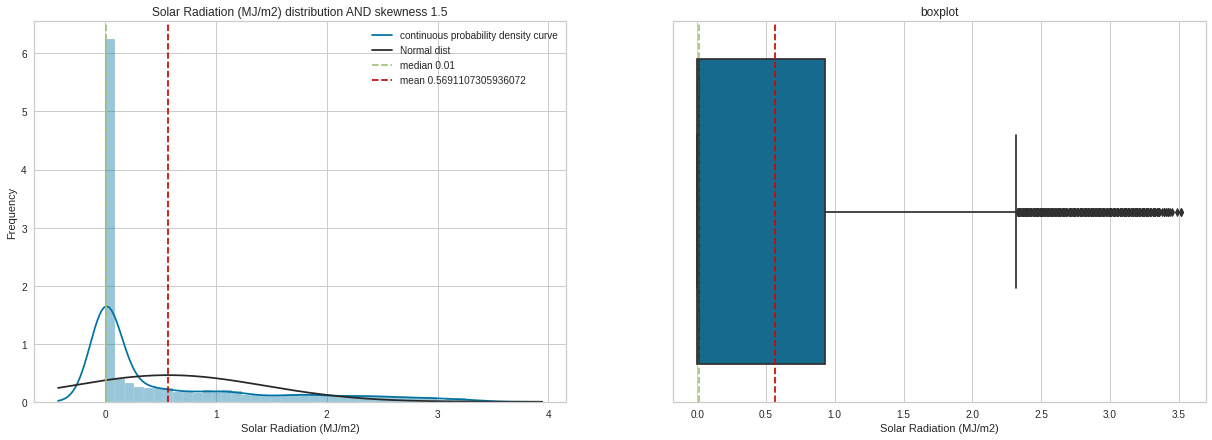

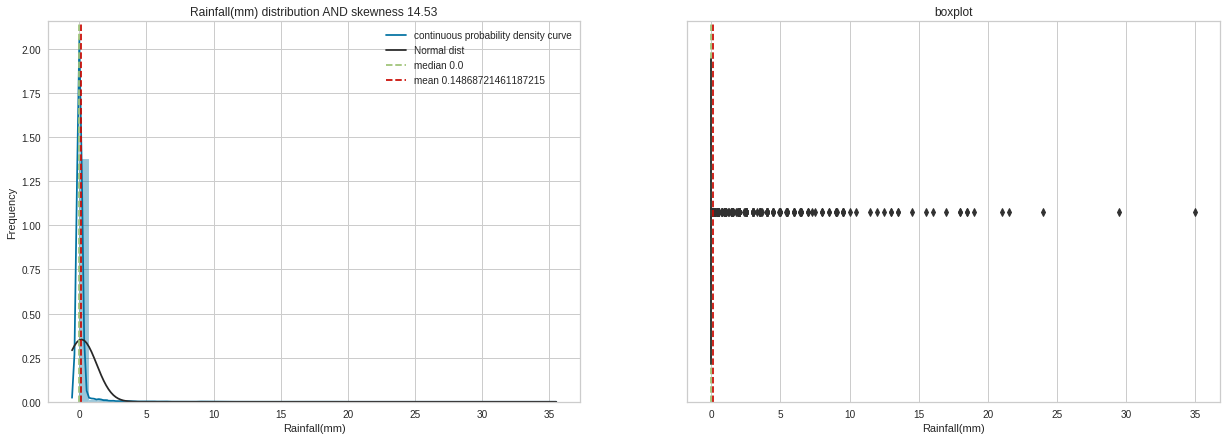

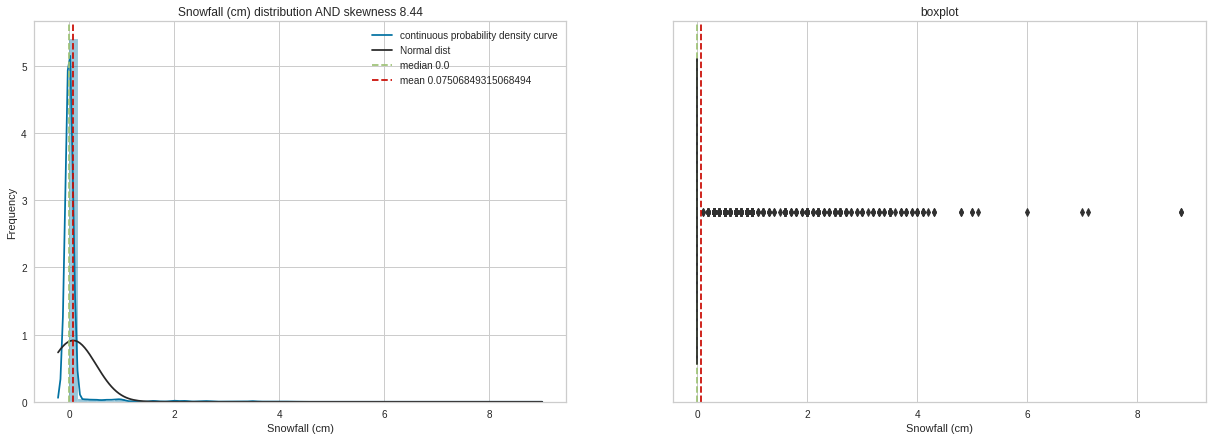

In [20]:
# density plot of numerical columns
#distribution of continuous feature

continuous_features = [ 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
                       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for col in continuous_features:

  plt.figure(figsize=(21,7))

  mean1 = df[col].mean()
  median1 = df[col].median()

  plt.subplot(1, 2, 1)
  sns.distplot(df[col] , fit=norm, kde =True)
  plt.axvline(np.median(df[col]),color='g', linestyle='--', label = 'median')
  plt.axvline(np.mean(df[col]),color='r', linestyle='--', label = 'mean')  
  plt.legend(['continuous probability density curve', 'Normal dist', f'median {median1}', f'mean {mean1}' ] , loc='best')    
  plt.ylabel('Frequency') 
  plt.title(f'{col} distribution AND skewness {round(df[col].skew(),2)}')

  plt.subplot(1, 2, 2)
  sns.boxplot(df[col])
  plt.axvline(np.median(df[col]),color='g', linestyle='--')
  plt.axvline(np.mean(df[col]),color='r', linestyle='--')  
  plt.title('boxplot') 
  
  plt.show()
  print(''' 
    
        ''')

**Insights:**
* Most of the continuous features are skewed due to their inherent values.


Since skewed features are constituted of inherent values, changing their natural distribution is not a good option. On this dataset, robust machine learning models such as Decision Tree, Random Forest, and others would be substantially more efficient than other regression-based models which are sensitive to skewness, although it should be prudent to start with simple models as a baseline.

> **Categorical Variable**

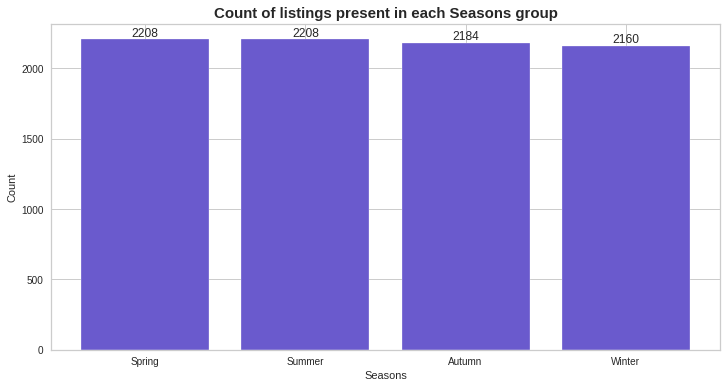

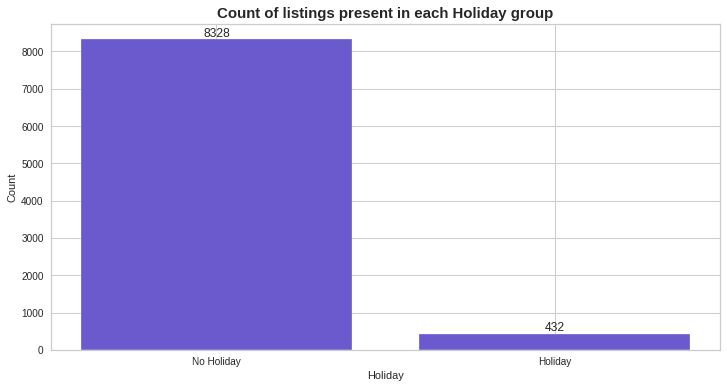

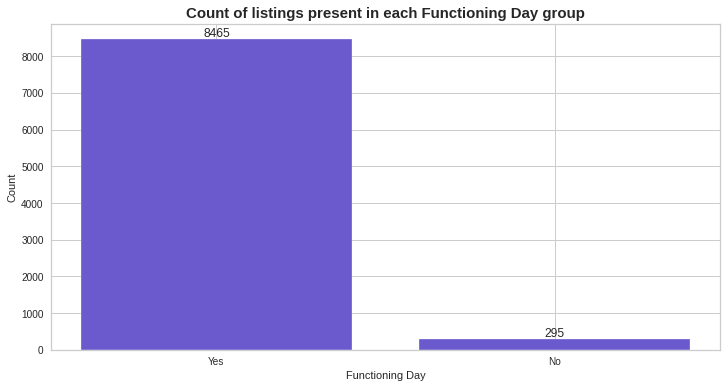

In [21]:
# Representation of Categorical features

categorical_features = ["Seasons", "Holiday", "Functioning Day"]

for col in categorical_features:
  fig = plt.figure(figsize = (12, 6))
 
  count = df[col].value_counts()
  count_plot = plt.bar(x = count.index, height = count.values, color = "slateblue")
  plt.bar_label(count_plot)

  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title(f"Count of listings present in each {col} group", fontsize = 15, fontweight = "bold")

  plt.show()

**Insights:** 
* All the seasons are equally represented in the data.
* In the dataset, holidays account for only 4.93 per cent of the overall.
* The dataset only has a 3.3 per cent representation of non-functioning days.

Since the data is from the years 2017 and 2018, these representations appear to be accurate within this time period.

> **Cyclical Variable**

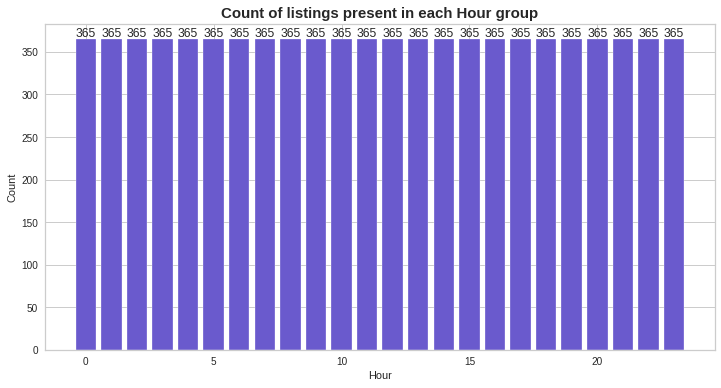

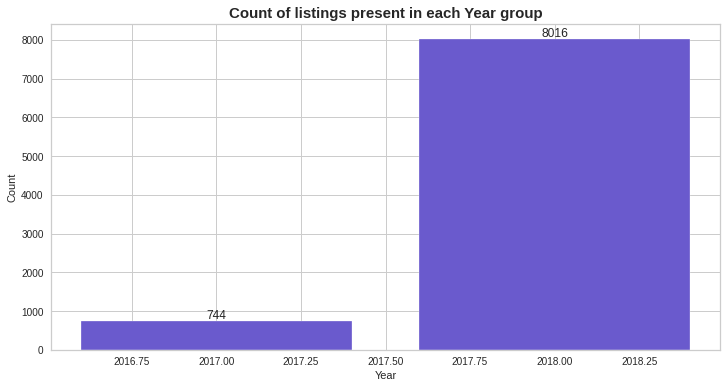

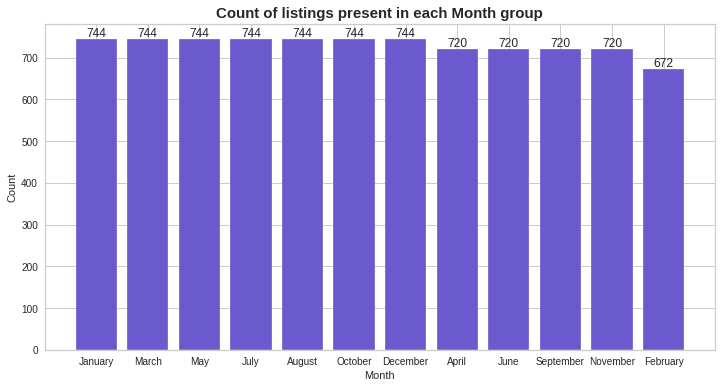

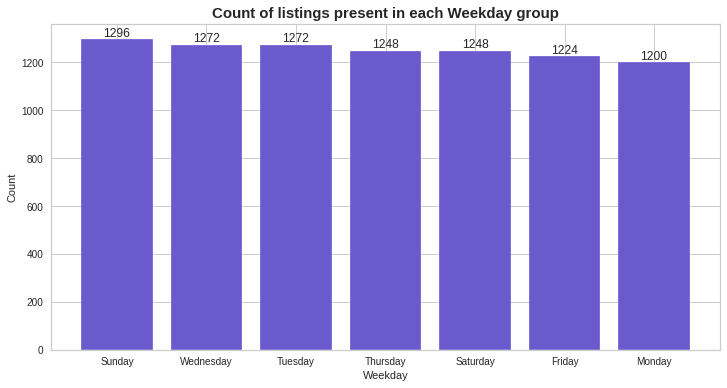

In [22]:
# Representation of Cyclical features

Cyclical_features = ["Hour", "Year", "Month", "Weekday"]
 
for col in Cyclical_features:
  fig = plt.figure(figsize = (12, 6))
 
  count = df[col].value_counts()
  count_plot = plt.bar(x = count.index, height = count.values, color = "slateblue")
  plt.bar_label(count_plot)

  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title(f"Count of listings present in each {col} group", fontsize = 15, fontweight = "bold")

  plt.show()

**Insights:**
 * The majority of the data was collected in 2018.
 * Except for the year, all cyclical features are equally represented.



Within the time of collected data, the representation of cyclical features also appears to be true.

> **2.(b).(i) Bivariate Analysis**

> **1. Relation between Continuous variables and Dependent variable**

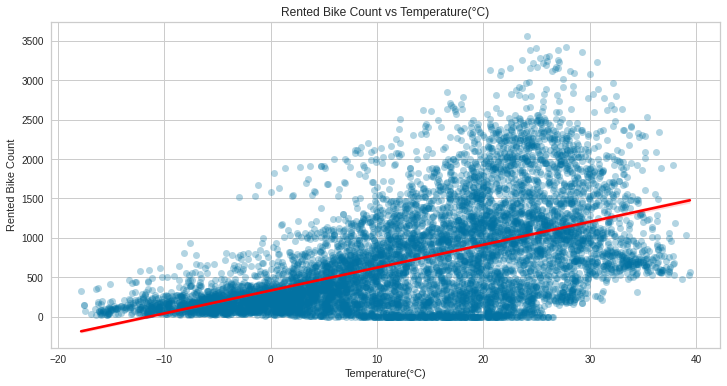

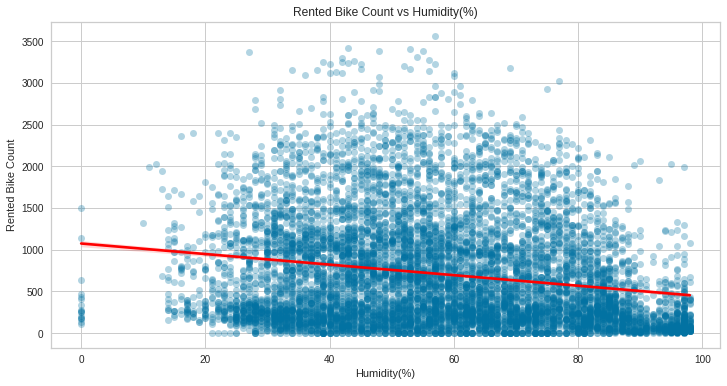

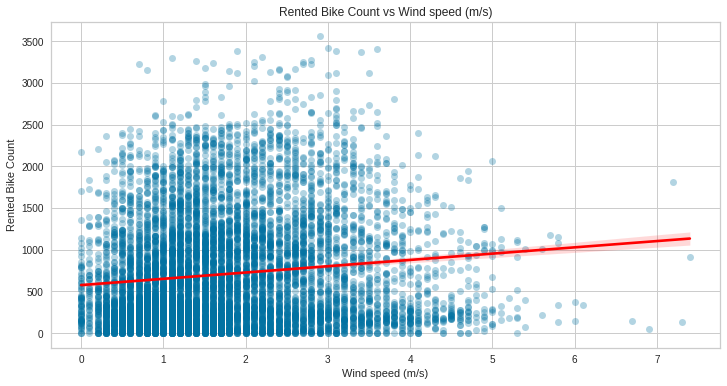

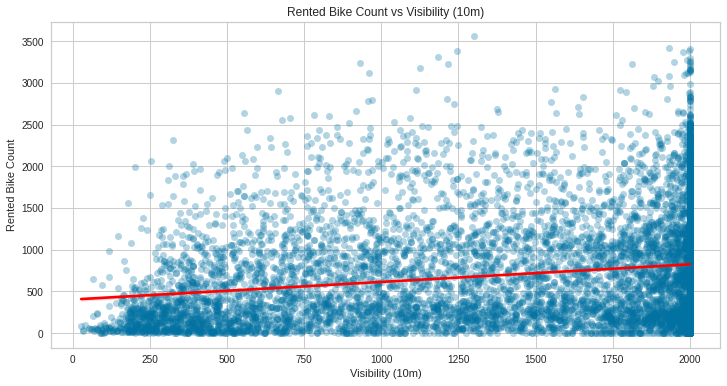

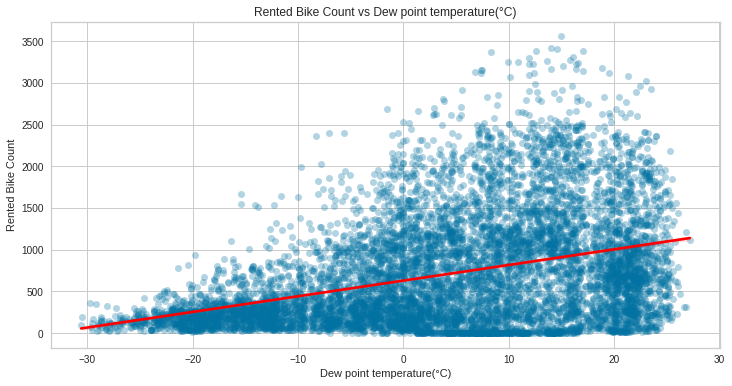

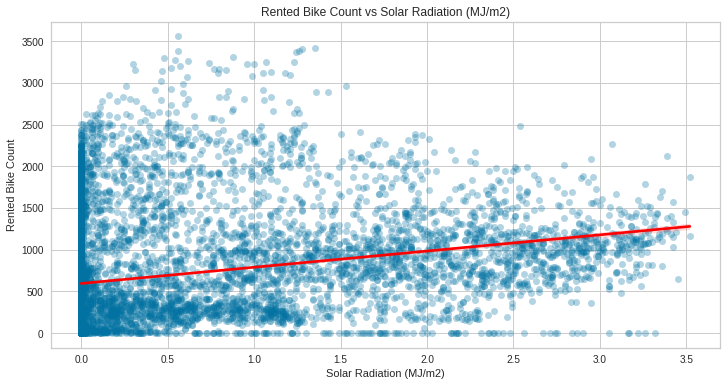

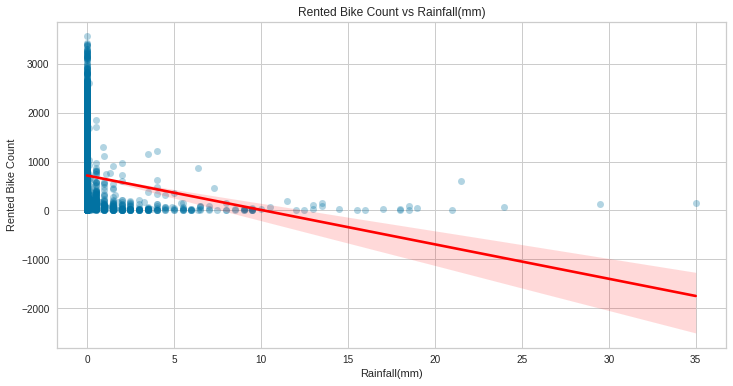

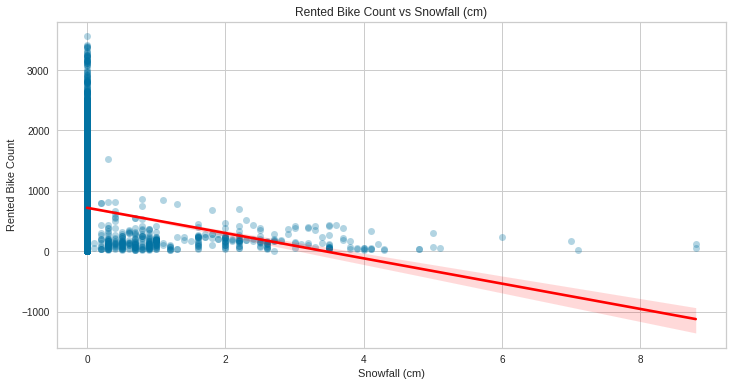

In [23]:
# Visualising the relation between bike count and continuous variables

for col in continuous_features:
  fig = plt.figure(figsize = (12, 6))
  sns.regplot(x = df[col] ,y = df['Rented Bike Count'] , line_kws={"color": "red"}, scatter_kws={'alpha':0.3})
  plt.title("Rented Bike Count vs " + col)


**Insights**

* Most features are in positive linear relationship with dependent variable except 'Snowfall',  'Rainfall' and 'Humidity'

* Humidity, rainfall, and snowfall have a negative linear relationship with dependent variable.

It appears that continuous features have a linear relationship to rented bike count, I can use Linear Regression to create a simple baseline model to get a head start.

> **2. Relation between Categorical variables and Dependent variable**



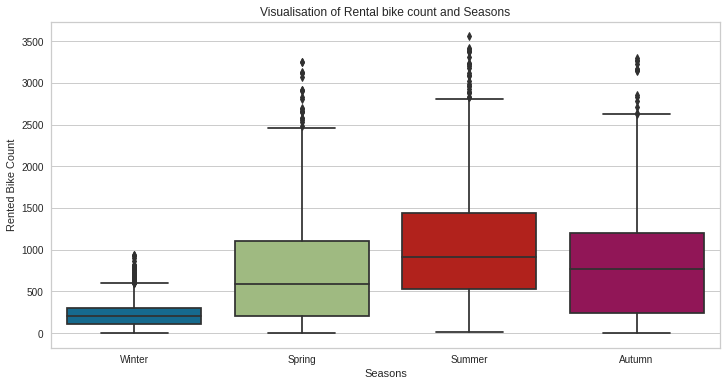

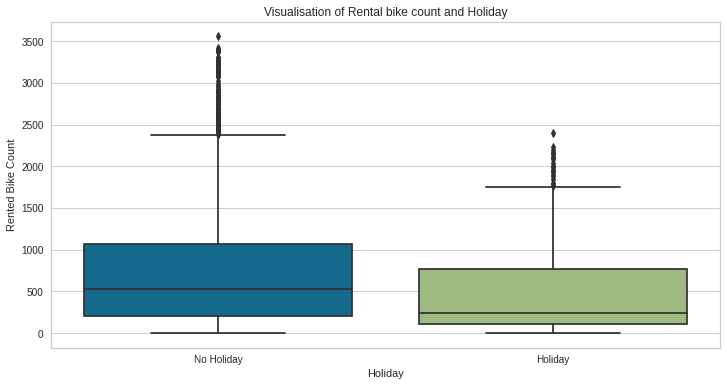

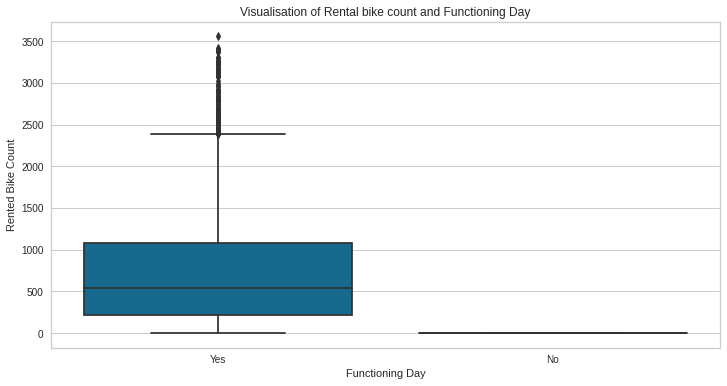

In [24]:
# Visualising the relation between rented bike count and categorical variables

for col in categorical_features:
  fig = plt.figure(figsize = (12, 6))
  ax = fig.gca()
  feature = df[col]
  label = df["Rented Bike Count"]
  sns.boxplot(x = feature, y = label)
  ax.set_title("Visualisation of Rental bike count and " + col)
  
plt.show()

**Insights:**

* In the summer and autumn, there is a large demand for bicycles, however in the winter, there is low demand.
* During the holidays, there is very little demand for bikes.
* On non-working days, bike demand is basically non-existent.
* There is a significant overlap in the distribution of sub-categories of Seasons and Holiday variables.

The distribution of these overlapped sub-categories in categorical features like Seasons and Holidays indicates that these sub-categories might be less useful for the models. I will, however, leave it up to our models to select which features are appropriate for them.

> **2. Relation between Cyclical variables and Dependent variable**

In [25]:
Cyclical_features

['Hour', 'Year', 'Month', 'Weekday']

Text(0.5, 1.0, 'Visualisation of Rental bike count and Month')

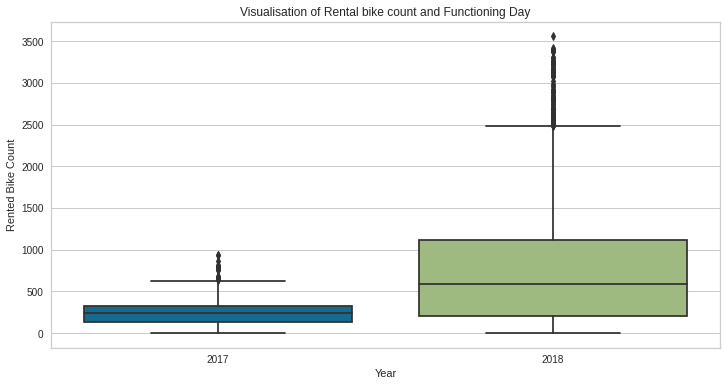

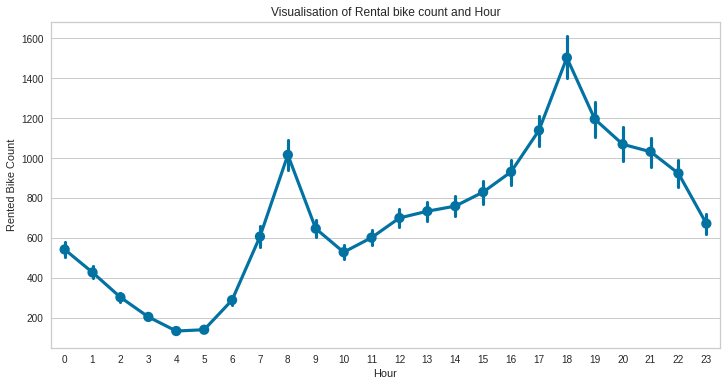

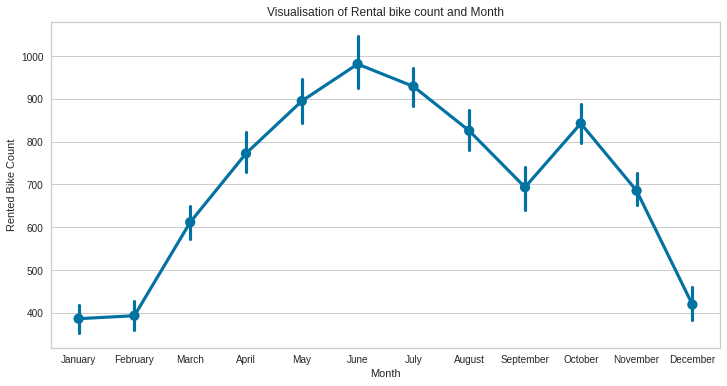

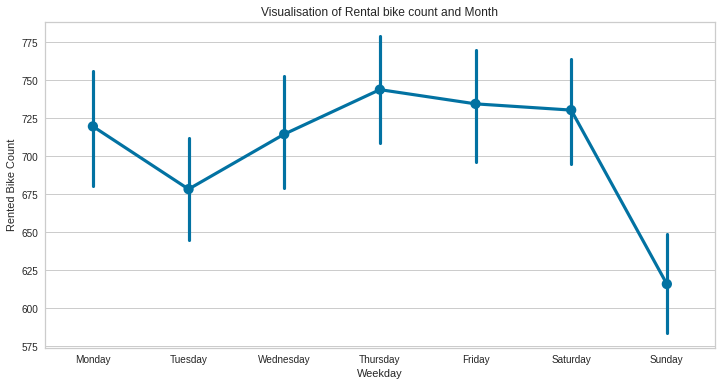

In [26]:
# Visualising the relation between rented bike count and Cyclical variables

# months_order = ["January", "February", "March", "April", "May", "June", "July", 
#                 "August", "September", "October", "November", "December"]
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
feature = df[ 'Year']
label = df["Rented Bike Count"]
sns.boxplot(x = feature, y = label)
ax.set_title("Visualisation of Rental bike count and " + col)

for col in ['Hour', 'Month']:
  fig = plt.figure(figsize = (12, 6))
  ax = fig.gca()
  feature = df[ col]
  label = df["Rented Bike Count"]
  sns.pointplot(x = feature, y = label)
  ax.set_title("Visualisation of Rental bike count and " + col)

fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
feature = df['Weekday']
label = df["Rented Bike Count"]
sns.pointplot(x = feature, y = label, order = days_order)
ax.set_title("Visualisation of Rental bike count and " + col)

**Insights:**

* There is a noticeable increase in the number of rented bikes in the 8th and 18th hour of the day.
* When compared to 2017, the number of shared bikes on the road climbed dramatically in 2018.
* In the months of May, June, and July, there is a larger demand for bicycles.
* The demand for bicycles is highest on Thursdays and Fridays, and lowest on Sundays.



The cyclical features appear to have a significant impact on the rented bike count.

> **Multivariate Analysis**

In [27]:
#pairplot

# sns.pairplot(df )#, hue = df["Rented Bike Count"] )


**Insights**

* All features are linear relationship with dependent variable

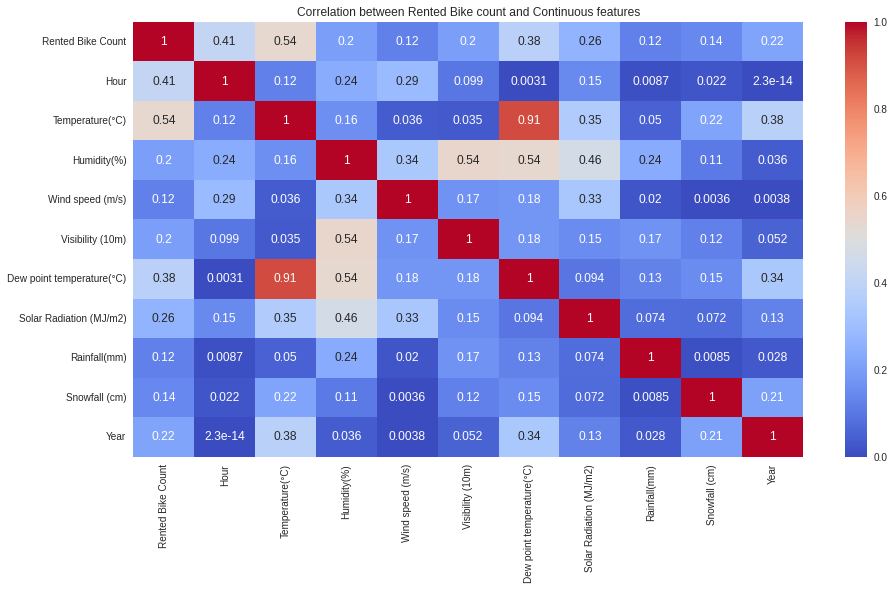

In [28]:
# Correlation matrix

plt.figure(figsize = (15, 8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")
plt.title("Correlation between Rented Bike count and Continuous features")

plt.show()

**Insights:**

* The number of rental bikes is highly correlated with hour and temperature.
* Multicollinearity appears to exist in the data.

Although all continuous features appear to have a linear relationship with the dependent variable, only a few appear to be strongly correlated.



> **Checking Multicollinearity**

In [29]:
# Using VIF to detect multicollinearity

def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

In [30]:
cal_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count"]]])


,variables,VIF
0,Hour,4.5
1,Temperature(°C),188.5
2,Humidity(%),186.9
3,Wind speed (m/s),4.8
4,Visibility (10m),10.3
5,Dew point temperature(°C),127.0
6,Solar Radiation (MJ/m2),2.9
7,Rainfall(mm),1.1
8,Snowfall (cm),1.1
9,Year,397.8


Dew Point temperature and Year are highly correlated features. Therefore, I will drop both the features.



In [31]:
cal_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count",'Year','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,3.9
1,Temperature(°C),3.2
2,Humidity(%),4.9
3,Wind speed (m/s),4.6
4,Visibility (10m),4.7
5,Solar Radiation (MJ/m2),2.2
6,Rainfall(mm),1.1
7,Snowfall (cm),1.1


> **3. Prepare Data**

**3. (a) Data Cleaning**

In [32]:
# (b) Feature Selection

In [33]:
#Encoding cyclical feature into thier numerical representation for later transforamtion

month_mapping = {"January":0, "February":1, "March":2, "April":3, "May":4, "June":5, "July":6, "August":7,
                "September":8, "October":9, "November":10, "December":11}
weekday_mapping = {"Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}

df['Month'] = df.Month.map(month_mapping)
df['Weekday'] = df.Weekday.map(weekday_mapping)

In [34]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,0,3
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,0,3
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,0,3
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,0,3
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,10,4
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,10,4
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,10,4
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,10,4


In [35]:
df['Month_sin'] =   np.sin(df.Month * (2 * np.pi/12) )
df['Month_cos'] =   np.cos(df.Month * (2 * np.pi/12) )
df['Weekday_sin'] = np.sin(df.Weekday * (2 * np.pi/7) )
df['Weekday_cos'] = np.cos(df.Weekday * (2 * np.pi/7) )
df['Hour_sin'] =    np.sin(df.Hour * (2 * np.pi/24) )
df['Hour_cos'] =    np.cos(df.Hour * (2 * np.pi/24) )

Sine and Cosine transformation on Cyclical features will depict these features as (x,y) coordinate of a circle helping the algorithm to better interpret them as cyclic in nature, improving thier predicting power.

**Is this encoding system perfect? Unfortunately no and here are some reasons why:**
* **You are converting one information into two features**, which will mathematically assign more weight to it from the algorithm perspective.

* **Decision trees based algorithms** (Random Forest, Gradient Boosted Trees, XGBoost) build their split rules according to one feature at a time. This means that they **will fail to process these two features simultaneously** whereas the cos/sin values are expected to be considered as one single coordinates system.

However, trade-offs are sometimes part of the game and this remains a nice way to encode cyclical features.

[*source*](https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca)

**3. (b) Feature Selection**

In [36]:
#Droping few columns to avoid multicollinearity 

df.drop(columns = ['Dew point temperature(°C)', 'Year', 'Month', 'Weekday', 'Hour' ], inplace = True )
df.head(3)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month_sin,Month_cos,Weekday_sin,Weekday_cos,Hour_sin,Hour_cos
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.0,1.0,0.4,-0.9,0.0,1.0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.0,1.0,0.4,-0.9,0.3,1.0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.0,1.0,0.4,-0.9,0.5,0.9


 **Train Test Split**

In [37]:
#Diving the dataset into train and test set using random sampling

rng = np.random.RandomState(0) 
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = rng)

In [38]:
print(train_set.shape)
print(test_set.shape)

(7008, 17)
(1752, 17)


In [39]:
#Seperating the feature and target lablels from training set 
Y = train_set["Rented Bike Count"].copy() 
features = train_set.drop(columns = ['Rented Bike Count'])

 **3. (c) Data Transforms**


In [40]:
# apply sq-rt transforamtion on target label
bike_count = np.sqrt(Y) 

In [41]:
# features

In [42]:
#performing Min-Max scaling on numerical features of training set 
#to scale them in range of 0 and 1
num_attribs = features.describe().columns 
scaler = MinMaxScaler() 
features[num_attribs] = scaler.fit_transform(features[num_attribs])
features[num_attribs] = scaler.fit_transform(features[num_attribs])

In [43]:
# Separating the features and target labels from the test set and also applying square root transformation on the target label

test_bike_count = np.sqrt(test_set["Rented Bike Count"].copy())
test_features = test_set.drop(columns = "Rented Bike Count") 

In [44]:
# Applying the MinMax scaling on the numerical features of the test set

test_features[num_attribs] = scaler.transform(test_features[num_attribs])

Applying these features scaling and sqrt transformation on numerical features and dependent variable respectively, would helps us in faster training and improved results.

In [45]:
#One-Hot encoding of categoriacal feature both train and test for linear and distance based model

lr_features = pd.get_dummies(features, columns = ["Seasons", "Functioning Day", "Holiday"], drop_first = True)
lr_test_features = pd.get_dummies(test_features, columns = ["Seasons", "Functioning Day", "Holiday"], drop_first = True)

For learning algorithms that either learn a single weight per feature (eg. Linear Regression) or use distance metrics between samples (KNeighbors Regressor), using one-hot encoding for categorical features would allow the representation of categorical data to be more expressive. 

*Therefore, I will use one-hot encoded features when using these types of models.*

In [46]:
 # Ordinal encoding of categorical features of both train and test set for tree based models

seasons_mapping = {"Winter": 0, "Spring": 1, "Summer": 2, "Autumn": 3}
func_day_mapping = {"Yes": 1, "No": 0}
holiday_mapping = {"Holiday": 1, "No Holiday": 0}

tree_features = features.copy()
tree_test_features = test_features.copy()

tree_features["Seasons"] = tree_features["Seasons"].map(seasons_mapping)
tree_features["Functioning Day"] = tree_features["Functioning Day"].map(func_day_mapping)
tree_features["Holiday"] = tree_features["Holiday"].map(holiday_mapping)
tree_test_features["Seasons"] = tree_test_features["Seasons"].map(seasons_mapping)
tree_test_features["Functioning Day"] = tree_test_features["Functioning Day"].map(func_day_mapping)
tree_test_features["Holiday"] = tree_test_features["Holiday"].map(holiday_mapping)

Tree-based models, such as Decision Trees, Random Forests, and Boosted Trees, typically don't perform well with one-hot encodings as they pick the feature to split on based on how well that splitting the data on that feature will "purify" it. One-hot encoding creates lots of levels, so only a small fraction of the data (typically) will belong to any given level, so the one-hot encoded columns will be mostly zeros. Since splitting on this column will only produce a small gain, tree-based algorithms typically ignore the information in favour of other columns.

**As a result, for tree-based models, I will use ordinal encoded features.**

> **Evaluation metric**

I will use root mean squared error to evaluate the performance of the ML models. It is the most widely used metric for assessing the accuracy of forecasts. It uses Euclidean distance to demonstrate how far predictions differ from measured true values.
The root mean square error is calculated as follows:

  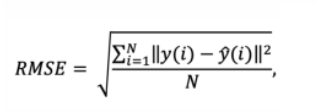

where N is the number of data points, y(i) is the ith measurement, and ŷ(i) is its corresponding prediction.
In RMSE as the errors are squared before they are averaged, it gives a relatively high weight to large errors which makes RMSE most useful when large errors are particularly undesirable.


> **Utils for Model training**

In [47]:
# Calculates the model's RMSE

def rmse(bike_count, bike_count_pred):
  '''
  Calculates the model's RMSE
  ''' 
  bike_count = np.square(bike_count).round()                                            # Converting the bike_count into its original form
  bike_count_pred = np.square(bike_count_pred).round()                                  # Converting the predicted bike count into original form
  
  return mean_squared_error(bike_count, bike_count_pred, squared = False)

In [48]:
# Select the features using the estimators passed wrapped in RFE and visualize the results

def feature_selection(model, features, label):
  '''
  Select the features using the estimators passed wrapped in RFE and visualize the results

  rfecv is
  Recursive Feature Elimination, Cross-Validated (RFECV) feature selection. 
  Selects the best subset of features for the supplied estimator 
  by removing 0 to N features (where N is the number of features) 
  using recursive feature elimination, 
  then selecting the best subset based on the cross-validation score of the model.
  '''
  rfe = rfecv(estimator = model, X = features, y = label,
              scoring = make_scorer(rmse, greater_is_better = False), cv = 5)
  features_name = features.columns.tolist()
  cols, sel, rank = [], [], []
  for i in range(len(features_name)):
    cols.append(features_name[i])
    sel.append(rfe.support_[i])
    rank.append(rfe.ranking_[i])
  features_df = pd.DataFrame({"Columns": cols, "Selected": sel, "Rank": rank})
  selected_features = features_df[features_df["Selected"] == True]["Columns"].tolist()

  return selected_features

In [49]:
# Evaluates the performance of the model on the training and on cross-validation set

def evaluate(model, data_prepared, label_prepared, cross_val = False):
  '''
  Evaluates the performance of the model on the training and on cross-validation set
  ''' 
  if cross_val:
    model_scores = cross_val_score(model, data_prepared, label_prepared,
                                   scoring = make_scorer(rmse, greater_is_better = False), cv = 5)
    score = np.mean(-model_scores)
  else:
    bike_count_pred = model.predict(data_prepared)
    score = rmse(label_prepared, bike_count_pred)
    
  return score

In [50]:
# Visualize the learning curve of the model

def plot_learning_curves(model, data_prepared, label_prepared):
  '''
  Visualize the learning curve of the model
  '''
  visualizer = LearningCurve(model, scoring = make_scorer(rmse, greater_is_better = False), cv = 5)
  visualizer.fit(data_prepared, label_prepared) 
  
  visualizer.show()

In [51]:
# Visualize the validation curve 

def plot_validation_curve(model, data_prepared, label_prepared, param_dict):
  '''
  Visualize the validation curve 
  '''
  for param in param_dict:
    viz = validation_curve(
    model, data_prepared, label_prepared, param_name = param,
    param_range= param_dict[param], cv=5, scoring=make_scorer(rmse, greater_is_better = False))
    viz.fit(data_prepared, label_prepared)

  viz.show()

> **Model training**


**Note**- The rmse value in all feature selection, learning curves and validation curves is negative because I have used make scorer() with the parameter greater is better = False in parameters, which causes the scorer object to sign-flip the score func's result.

**Linear Regression**


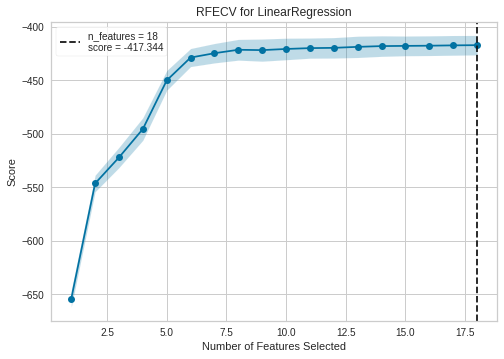

In [52]:
# Feature selection using Linear Regression wrapped in RFE

lr_selc_features = feature_selection(LinearRegression(), lr_features, bike_count)

In [53]:
# Displaying the selected features

lr_selc_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Month_sin',
 'Month_cos',
 'Weekday_sin',
 'Weekday_cos',
 'Hour_sin',
 'Hour_cos',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Functioning Day_Yes',
 'Holiday_No Holiday']

In [54]:
# Final data prepared after feature selection

lr_data_prep = lr_features[lr_selc_features].copy()
lr_test_data_prep  = lr_test_features[lr_selc_features].copy()

In [55]:
# Training the Linear Regression model

lr = LinearRegression()
lr.fit(lr_data_prep, bike_count)

LinearRegression()

In [56]:
# Evaluating the performance of the model on training set

lr_rmse = evaluate(model = lr, data_prepared = lr_data_prep, label_prepared = bike_count)
lr_rmse

416.20516525306766

In [57]:
# Evaluating the performance of the model using cross-validation

lr_val_rmse = evaluate(model = lr, data_prepared = lr_data_prep, label_prepared = bike_count, cross_val = True)
lr_val_rmse 

417.34365201948293

It seems that the Linear Regression model is underfitting the data.

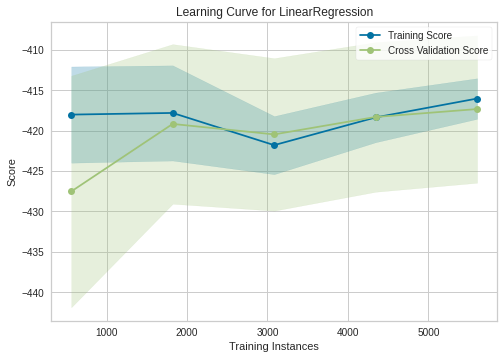

In [58]:
# Visualising the performance of the model on training and validation set using cross validation 

plot_learning_curves(model = lr, data_prepared = lr_data_prep, label_prepared = bike_count)

By examining the learning curve, I can see that the model is suffering from high bias and that adding more data won't help the model perform better.



* Adding more features, lowering regularization, and using a more powerful model are some strategies for reducing high bias. 

* The first two alternatives are ruled out because I've already built new features and passed them to the model, and I'm already using an unregularized model. As a result, 

* I will continue to try to improve the results by using more advanced algorithms.

> **KNeighbors Regressor**

In [59]:
# Copying the data

knn_data_prep = lr_features.copy()
knn_test_data_prep = lr_test_features.copy() 

In [60]:
# Training the Linear Regression model 

knn = KNeighborsRegressor()
knn.fit(knn_data_prep, bike_count)

KNeighborsRegressor()

In [61]:
# Evaluating the performance of the model on training set

knn_rmse = evaluate(model = knn, data_prepared = knn_data_prep, label_prepared = bike_count)
knn_rmse

211.67194392173778

In [62]:
# Evaluating the performance of the model using cross-validation

knn_val_rmse = evaluate(model = knn, data_prepared = knn_data_prep, label_prepared = bike_count, cross_val = True)
knn_val_rmse 

289.9478234722627

It seems that KNeighbors Regressor model is **underfitted**, but it still **outperforms** Linear Regression.



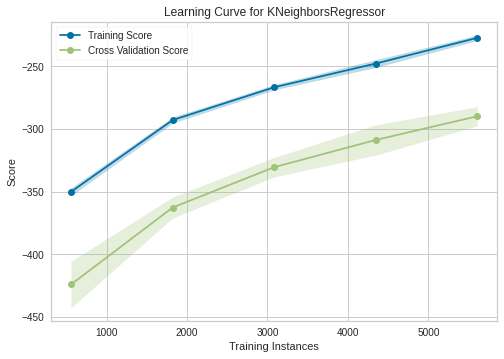

In [63]:
# Visualising the performance of the model on training and validation set using cross validation 

plot_learning_curves(model = knn, data_prepared = knn_data_prep, label_prepared = bike_count)

By examining the learning curve, I can see that the model is suffering from high bias.

As previously stated, I've already built new features and passed them to the model, the two options are to tweak the model's hyperparameters to reduce underfitting or use a more complex algorithm.

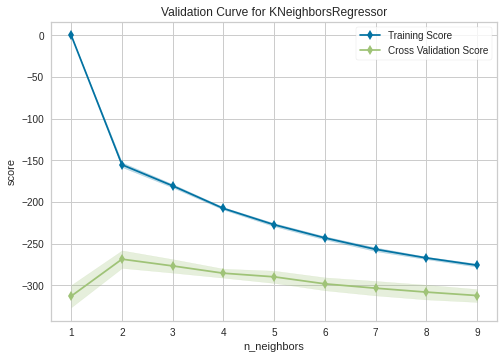

In [64]:
# Visualizing the validation curve for n_neighbors hyperparameter of the model

knn_param_dict = {"n_neighbors": range(1, 10)}
plot_validation_curve(model = knn, data_prepared = knn_data_prep, label_prepared = bike_count, param_dict = knn_param_dict)  

The validation curve for n_neighbors is visualized to assist in determining the best range of values for Grid Search hyperparameter tuning.



In [65]:
#Hyperparameter tuning using GridSearchCV 

param_grid = {
    'n_neighbors' : [2, 3, 4]
     }
knn_grid = KNeighborsRegressor()
knn_search = GridSearchCV(knn_grid, param_grid, cv = 5, scoring = make_scorer(rmse, greater_is_better = False), return_train_score = True, refit = True)

knn_search.fit(knn_data_prep, bike_count) 

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4]}, return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False))

In [66]:
# Displaying the best parameters

knn_search.best_params_

{'n_neighbors': 2}

In [67]:
# Evaluating the performance of hypertuned model on training set

hknn_rmse = evaluate(model = knn_search.best_estimator_, data_prepared = knn_data_prep, label_prepared = bike_count)
hknn_rmse

146.40209230498905

In [68]:
# Evaluating the performance of hypertuned model using cross-validation

hknn_val_rmse = evaluate(model = knn_search.best_estimator_, data_prepared = knn_data_prep, label_prepared = bike_count, cross_val = True)
hknn_val_rmse 

268.7229434769049

Although hyperparameter tuning has improved the model's performance, there is still room for improvement because the model is still underfitted. As a result, I'll move forward to experiment with other algorithms to succeed.

**Decision Tree Regressor**

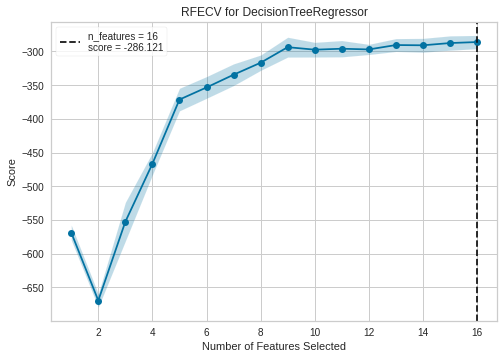

In [69]:
# Feature selection using Decision Tree wrapped in RFE

tree_selc_features = feature_selection(DecisionTreeRegressor(random_state = rng), tree_features, bike_count) 

In [70]:
# Displaying the selected features

tree_selc_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Month_sin',
 'Month_cos',
 'Weekday_sin',
 'Weekday_cos',
 'Hour_sin',
 'Hour_cos']

In [71]:
# Final data prepared after feature selection

tree_data_prep = tree_features[tree_selc_features].copy()
tree_test_data_prep  = tree_test_features[tree_selc_features].copy()

In [72]:
# Training the Decision Tree model

tree = DecisionTreeRegressor(random_state = rng)
tree.fit(tree_data_prep, bike_count)

DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x7F6608768E20)

In [73]:
# Evaluating the performance of the model on training set

tree_rmse = evaluate(model = tree, data_prepared = tree_data_prep, label_prepared = bike_count)
tree_rmse

0.0

In [74]:
# Evaluating the performance of the model using cross-validation

tree_val_rmse = evaluate(model = tree, data_prepared = tree_data_prep, label_prepared = bike_count, cross_val = True)
tree_val_rmse

289.3517195184967

Decision Tree appears to be overfitting the data, despite generating better results than Linear Regression and results that are quite similar to KNeighbors Regression on validation set

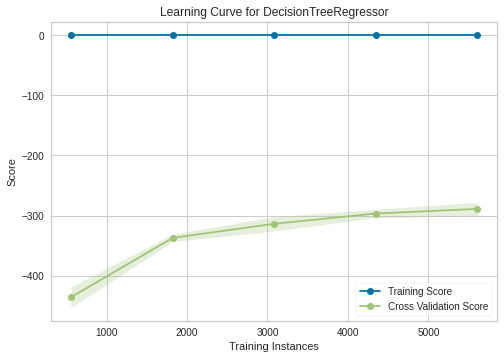

In [75]:
# Visualising the performance of the model on training and validation set using cross validation 

plot_learning_curves(model = tree, data_prepared = tree_data_prep, label_prepared = bike_count)

By examining the learning curve, I can see that the model is suffering from high variance and that adding more data could help it perform better.

Adding more data and performing feature selection are two strategies to reduce overfitting. However, I will rule out these two alternatives to reduce overfitting because I have already used 80% of the data provided for training and have also performed feature selection. As a result, I'll try to tweak the model's hyperparameters to reduce overfitting.

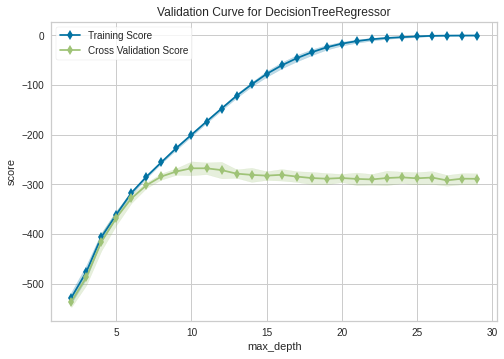

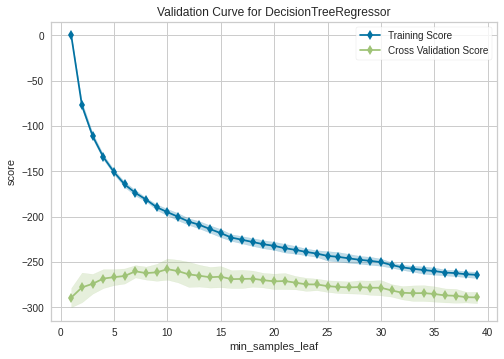

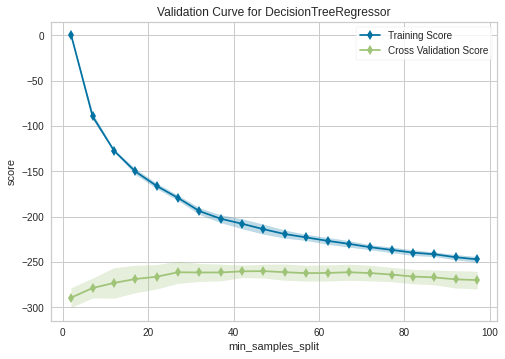

In [76]:
# Visualizing the validation curve for various hyperparameter of the model

tree_param_dict = {"max_depth": range(2, 30), "min_samples_leaf": range(1, 40), "min_samples_split": range(2, 100, 5)}
plot_validation_curve(model = tree, data_prepared = tree_data_prep, label_prepared = bike_count, param_dict = tree_param_dict)

The validation curves for various hyperparameters of Decision Tree are visualized to assist in determining the best range of values for Grid Search hyperparameter tuning.



In [77]:
# Hyperparameter tuning using GridSearchCV

param_grid = {
    "max_depth": [max_depth for max_depth in range(10, 15)],
    "min_samples_leaf": [min_samples_leaf for min_samples_leaf in range(9, 15, 2)],
    "min_samples_split": [min_samples_split for min_samples_split in range(32, 47, 2)], 
}

tree_grid = DecisionTreeRegressor(random_state = rng)
tree_search = GridSearchCV(tree_grid, param_grid, cv = 5, scoring = make_scorer(rmse, greater_is_better = False), return_train_score = True, refit = True)

tree_search.fit(tree_data_prep, bike_count)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x7F6608768E20),
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'min_samples_leaf': [9, 11, 13],
                         'min_samples_split': [32, 34, 36, 38, 40, 42, 44, 46]},
             return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False))

In [78]:
# Displaying the best paramaters

tree_search.best_params_

{'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 32}

In [79]:
# Evaluating the performance of hypertuned model on training set

htree_rmse = evaluate(tree_search.best_estimator_, tree_data_prep, bike_count)
htree_rmse

205.01701399492984

In [80]:
# Evaluating the performance of the model using cross-validation

htree_val_rmse = evaluate(tree_search.best_estimator_, tree_data_prep, bike_count, cross_val = True)
htree_val_rmse

262.0022859492765

Although hyperparameter tuning improves the model's performance on the validation set, it has the opposite effect on the training set. As a result, when compared to KNeighbors Regressor, the model's overall performance falls behind. As a result, I'm going to try out an ensemble model to see if I can improve the performance.

**Random Forest Regressor**


In [81]:
# Copying the data

rf_features = tree_features.copy()
rf_test_features = tree_test_features.copy()

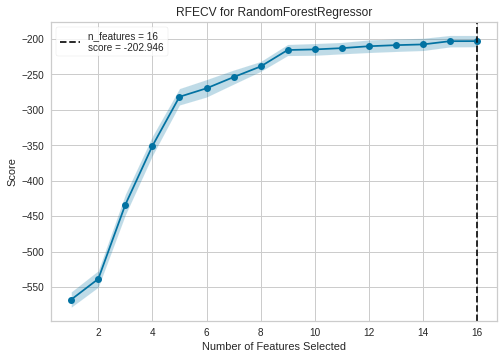

In [82]:
# Feature selection using Random Forest wrapped in RFE

rf_selc_features = feature_selection(RandomForestRegressor(random_state = rng), rf_features, bike_count)

In [83]:
# rf_selc_features = ['Temperature(°C)',
#  'Humidity(%)',
#  'Wind speed (m/s)',
#  'Visibility (10m)',
#  'Solar Radiation (MJ/m2)',
#  'Rainfall(mm)',
#  'Snowfall (cm)',
#  'Seasons',
#  'Holiday',
#  'Functioning Day',
#  'Month_sin',
#  'Month_cos',
#  'Weekday_sin',
#  'Weekday_cos',
#  'Hour_sin',
#  'Hour_cos']

In [84]:
# Displaying the selected features

rf_selc_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Month_sin',
 'Month_cos',
 'Weekday_sin',
 'Weekday_cos',
 'Hour_sin',
 'Hour_cos']

In [85]:
# Final data prepared after feature selection

rf_data_prep = rf_features[rf_selc_features].copy()
rf_test_data_prep  = rf_test_features[rf_selc_features].copy()

In [86]:
# Training the Random Forest model

rf = RandomForestRegressor(random_state = rng)
rf.fit(rf_data_prep, bike_count) 

RandomForestRegressor(random_state=RandomState(MT19937) at 0x7F6608768E20)

In [87]:
# Evaluating the performace of the model on the training set

rf_rmse = evaluate(model = rf, data_prepared = rf_data_prep, label_prepared = bike_count)
rf_rmse

73.65474364503298

In [88]:
# Evaluating the performance of the model using cross validation

rf_val_rmse = evaluate(model = rf, data_prepared = rf_data_prep, label_prepared = bike_count, cross_val = True)
rf_val_rmse

203.92063606241135

Despite Random Forest looking to be overfitting the data, it appears to be the most promising model trained so far.

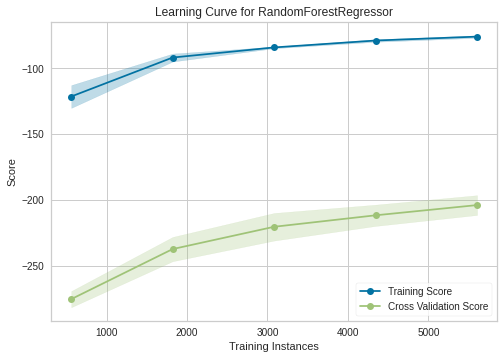

In [89]:
# Visualising the performance of the model on training and validation set using cross validation 

plot_learning_curves(model = rf, data_prepared = rf_data_prep, label_prepared = bike_count) 

By examining the learning curve, I can see that the model is suffering from high variance.

Once again, I'll strive to reduce overfitting by tweaking the model's hyperparameters.

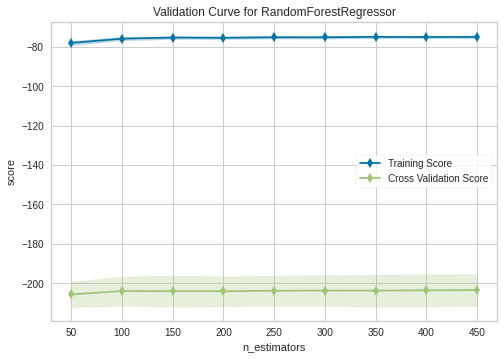

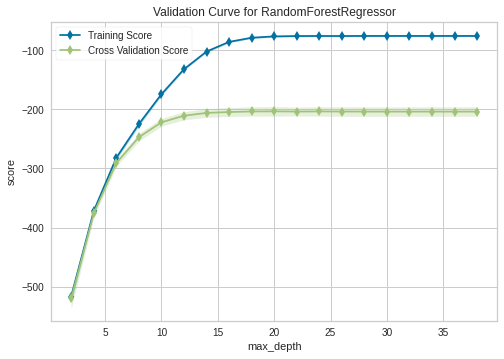

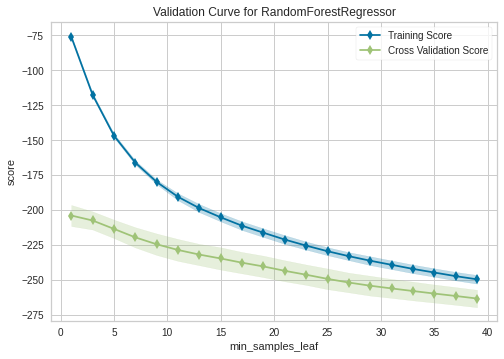

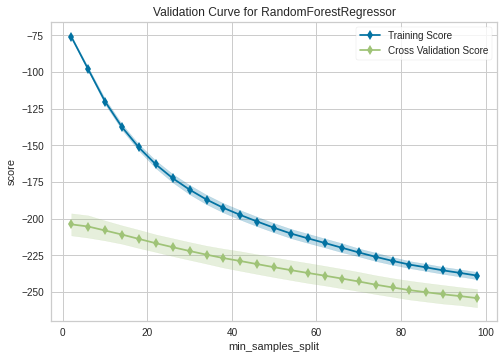

In [90]:
# Visualizing the validation curve for various hyperparameter of the model

rf_param_dict = {"n_estimators": range(50, 500, 50), "max_depth": range(2, 40, 2), "min_samples_leaf": range(1, 40, 2), "min_samples_split": range(2, 100, 4)}
plot_validation_curve(model = rf, data_prepared = rf_data_prep, label_prepared = bike_count, param_dict = rf_param_dict)  

In [91]:
# Hyperparameter tuning using GridSearchCV

param_grid = {
    "n_estimators": [n_estimator for n_estimator in range(250, 500, 50)],
    "max_depth": [max_depth for max_depth in range(20, 30, 2)],
    "min_samples_leaf" : [min_samples_leaf for min_samples_leaf in range(1, 4)],
}

rf_grid = RandomForestRegressor(random_state = rng)
rf_search = GridSearchCV(rf_grid, param_grid, cv = 5, scoring = make_scorer(rmse, greater_is_better = False), return_train_score = True, refit = True)

rf_search.fit(rf_data_prep, bike_count)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(random_state=RandomState(MT19937) at 0x7F6608768E20),
             param_grid={'max_depth': [20, 22, 24, 26, 28],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [250, 300, 350, 400, 450]},
             return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False))

In [92]:
# Displaying the best paramaters

rf_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 450}

In [93]:
# Evaluating the performace of the hypertuned model on the training set

hrf_rmse = evaluate(model = rf_search.best_estimator_, data_prepared = rf_data_prep, label_prepared = bike_count)
hrf_rmse

74.04226683048851

In [94]:
# Evaluating the performance of the hypertuned model using cross validation

hrf_val_rmse = evaluate(model = rf_search.best_estimator_, data_prepared = rf_data_prep, label_prepared = bike_count, cross_val = True)
hrf_val_rmse

203.8009758296384

There is a minor improvement in the model's performance after tweaking the Random Forest. Despite the fact that the model is still overfitted, it outperforms all preceding models. I'm going to stop experimenting now because feeding more data would only improve performance with the current computational resources.As a result, I'll go with Random Forest as my best model.

**Feature Importance**

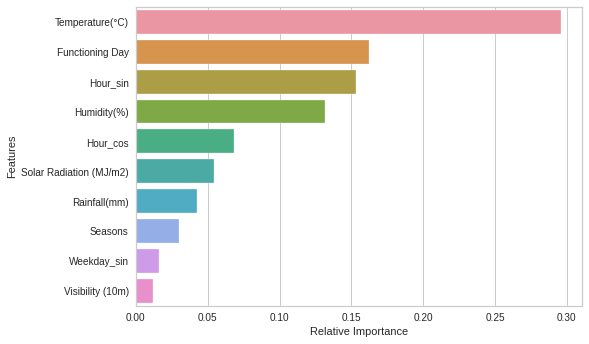

In [95]:
# Feature importance according to the best model

rf_importance = rf_search.best_estimator_.feature_importances_

importance_dict = {"Features": rf_selc_features, "Relative Importance": rf_importance}
importance_df = pd.DataFrame(importance_dict).sort_values(by=['Relative Importance'], ascending=False).head(10)
sns.barplot(x = "Relative Importance", y = "Features", data = importance_df)
plt.show()

The above visualisation shows the most important features on which bike count depends.



**Model Evaluation on Test set**

In [96]:
# Evaluating the performance of the best model on test set

pred = rf_search.best_estimator_.predict(rf_test_data_prep)
rmse(test_bike_count, pred)

678.8009207923138

**Conclusion**

The following points are concluded from the project to improve the supply of rental bikes as well as the growth of the rental bikes business:

The effort to increase the availability of rental bikes and to expand the rental bike industry has led to the following conclusions:

 
1. As the temperature rises, so does the number of bikes, which could be valuable for building additional rental stations and maintaining bike availability in hotter places.

2. Companies renting bikes should maintain more supply on Functional days and can have maintenance of the bikes on non-functional days to decrease the downtime in business.

 

3. Companies that rent bikes should keep a larger supply on functional days and can maintain the bikes on non-functional days to reduce business downtime.

 

4. As bike demand increases in the summer and autumn seasons, coupouns and schemes should be introduce so that prices should fall in the winter to encourage more people to ride bikes.

5. Maintaince should be done after 11 pm to 6 am and on sunday as demand are less.

6. We tried adding possible columns to make the model a bit more complex but for Linear Regression model it is still too general.

7. We have to make our model more complex for better discretion or move to tree and ensembling algorithm for better results.


In [97]:
# 4. Evaluate Algorithms


In [98]:
# a) Split-out validation dataset


In [99]:
# b) Test options and evaluation metric


In [100]:
# c) Spot Check Algorithms


In [101]:
# d) Compare Algorithms


In [102]:
# 5. Improve Accuracy


In [103]:
# a) Algorithm Tuning


In [104]:
# b) Ensembles


In [105]:
# 6. Finalize Model


In [106]:
# a) Predictions on validation dataset


In [107]:
# b) Create standalone model on entire training dataset


In [108]:
# c) Save model for later use